In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/9월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.566667,0.450000,1.259259,0.274799,3.151286,2.238070,7.668347,5.446124
1,중랑구,(구)신한은행 중랑교지점,1,0.550000,0.533333,1.031250,0.179746,2.589698,1.743811,5.740346,3.865346
2,중랑구,(구)신한은행 중랑교지점,2,0.316667,0.291667,1.085714,0.202704,2.738867,1.873231,10.847987,7.419415
3,중랑구,(구)신한은행 중랑교지점,3,0.266667,0.183333,1.454545,0.349394,3.508357,2.562021,20.221658,14.767113
4,중랑구,(구)신한은행 중랑교지점,4,0.133333,0.125000,1.066667,0.194664,2.687756,1.828731,25.030757,17.030757
...,...,...,...,...,...,...,...,...,...,...,...
49979,강서구,힐스테이트에코,19,1.258333,1.291667,0.974194,0.099850,3.825861,2.948941,3.377682,2.603488
49980,강서구,힐스테이트에코,20,0.991667,1.075000,0.922481,0.078741,3.466801,2.616958,3.794737,2.864504
49981,강서구,힐스테이트에코,21,0.691667,0.733333,0.943182,0.086935,3.611837,2.750651,5.719128,4.355492
49982,강서구,힐스테이트에코,22,0.700000,0.791667,0.884211,0.064607,3.196098,2.369013,4.881215,3.618057


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.566667,0.450000,1.259259,3.151286,7.668347
1,중랑구,(구)신한은행 중랑교지점,1,0.550000,0.533333,1.031250,2.589698,5.740346
2,중랑구,(구)신한은행 중랑교지점,2,0.316667,0.291667,1.085714,2.738867,10.847987
3,중랑구,(구)신한은행 중랑교지점,3,0.266667,0.183333,1.454545,3.508357,20.221658
4,중랑구,(구)신한은행 중랑교지점,4,0.133333,0.125000,1.066667,2.687756,25.030757


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.246936,0.42466,0.334914,0.704993,0.505956,0.612106,0.46741,0.30527,0.580289,0.369054,0.497756,0.412154,0.629523,0.325264,0.308491,0.557753,0.383866,0.524813,0.580775,0.73673,0.388933,0.380529,0.285038,0.261182,0.398769


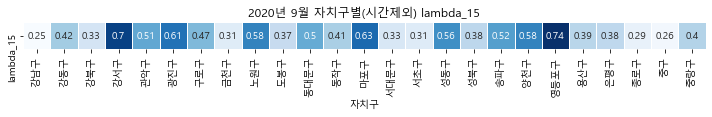

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.328812,0.541052,0.360597,0.808417,0.85368,1.14514,0.644996,0.495771,0.597164,0.424201,0.48801,0.583351,0.932585,0.422925,0.529259,0.908708,0.45322,0.666128,0.612558,1.094974,0.548303,0.575041,0.325981,0.292579,0.437263


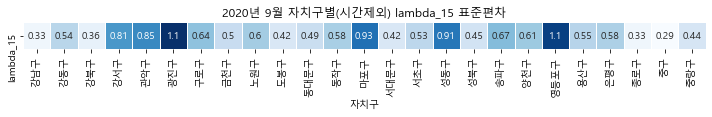

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.257473,0.415405,0.334245,0.697579,0.51179,0.604064,0.461757,0.310353,0.57688,0.365762,0.491908,0.410722,0.625818,0.330589,0.31486,0.547227,0.387274,0.522435,0.576998,0.734257,0.386633,0.372266,0.308109,0.27896,0.392615


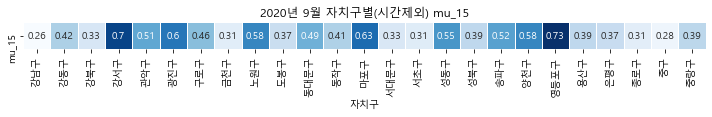

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.332651,0.497067,0.353795,0.778299,0.820428,1.042842,0.620549,0.459241,0.587708,0.408505,0.465972,0.514641,0.875363,0.386527,0.505796,0.852676,0.414824,0.659644,0.582226,1.039517,0.527723,0.514899,0.359735,0.324789,0.40405


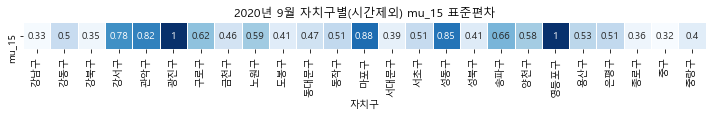

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.087466,1.092847,1.090344,1.244798,1.041641,1.074028,1.198595,1.40375,1.092348,1.172762,1.15776,1.04954,1.129319,1.101848,1.040049,1.206964,1.060829,1.11438,1.142298,1.200512,1.092589,1.150189,1.047534,1.127624,1.114375


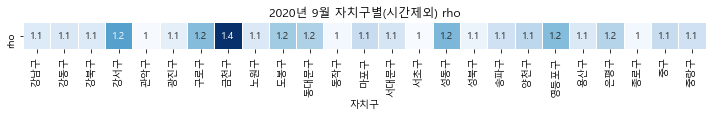

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.154879,2.258304,1.513347,3.886736,2.562171,3.548921,2.516557,1.448516,3.16575,1.951695,2.613849,2.236179,3.737604,1.564356,1.699651,3.156906,1.981277,2.97942,3.360023,4.497536,2.369337,2.094604,1.460193,1.300855,2.039614


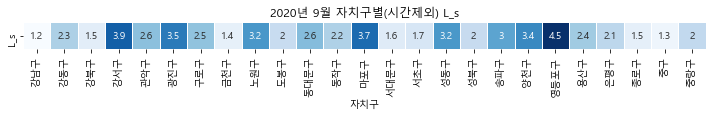

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.782158,2.835388,1.435801,4.055114,4.553105,7.588587,3.439663,2.195143,3.071317,2.333575,2.340129,3.229531,6.04746,2.181683,3.278796,4.931907,2.263608,3.985358,3.227863,7.17934,3.377837,3.563318,1.485139,1.319008,2.155848


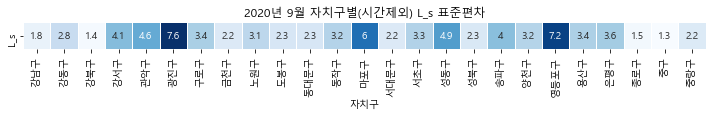

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,13.240464,15.434456,10.314921,21.137853,10.462948,15.488048,19.716345,17.823646,15.401815,15.583921,16.478649,12.836484,20.88809,12.890641,15.933388,19.878152,11.894401,19.38811,21.562654,24.205815,21.080339,14.911208,19.847029,23.17622,13.068488


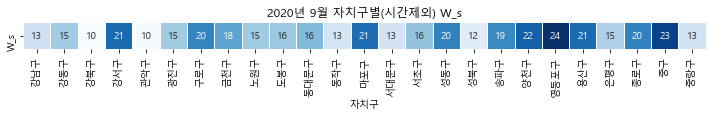

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,34.535471,37.131967,19.46699,57.862554,20.992764,38.284734,56.901258,43.584537,36.411207,45.743091,40.953288,29.967395,60.90695,30.991262,49.734498,65.620989,26.44407,60.552694,64.098279,69.883556,67.903326,60.331513,56.869245,70.768921,34.224424


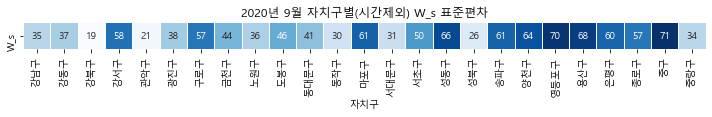

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.141012  0.127801  0.103490  0.074501  0.044729  0.026709  0.045584   
강동구  0.258192  0.232065  0.171124  0.110813  0.064087  0.062996  0.116567   
강북구  0.301142  0.268056  0.228636  0.156970  0.109242  0.079697  0.087576   
강서구  0.367808  0.298601  0.209904  0.139959  0.089139  0.082719  0.192418   
관악구  0.425473  0.367143  0.283974  0.191927  0.121615  0.107813  0.112500   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.181909  0.328205  0.249145  0.185470  0.202422  0.256780  0.279558   
강동구  0.266071  0.483631  0.276290  0.252282  0.295536  0.390079  0.433631   
강북구  0.172424  0.323939  0.216515  0.209242  0.220303  0.286364  0.313788   
강서구  0.458062  1.012022  0.561407  0.449863  0.554713  0.687910  0.720150   
관악구  0.238672  0.399870  0.290625  0.301302  0.355729  0.417057  0.465495   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.298647  0.320869  0.361396  0.484188  0.538746  0.457051  0.363818   
강동구  0.439484  0.480258  0.557440  0.716865  0.977381  0.895337  0.751984   
강북구  0.331212  0.374848  0.411970  0.494545  0.644494  0.625000  0.589394   
강서구  0.718579  0.813251  0.974385  1.264003  1.712090  1.463934  1.256557   
관악구  0.479036  0.513542  0.604427  0.760807  1.053125  1.047135  0.953646   

                                   
시간         21        22        23  
자치구                                
강남구  0.349430  0.307906  0.222934  
강동구  0.790377  0.734921  0.526190  
강북구  0.598636  0.561364  0.444091  
강서구  1.242623  1.067213  0.741667  
관악구  1.001042  0.937370  0.760286

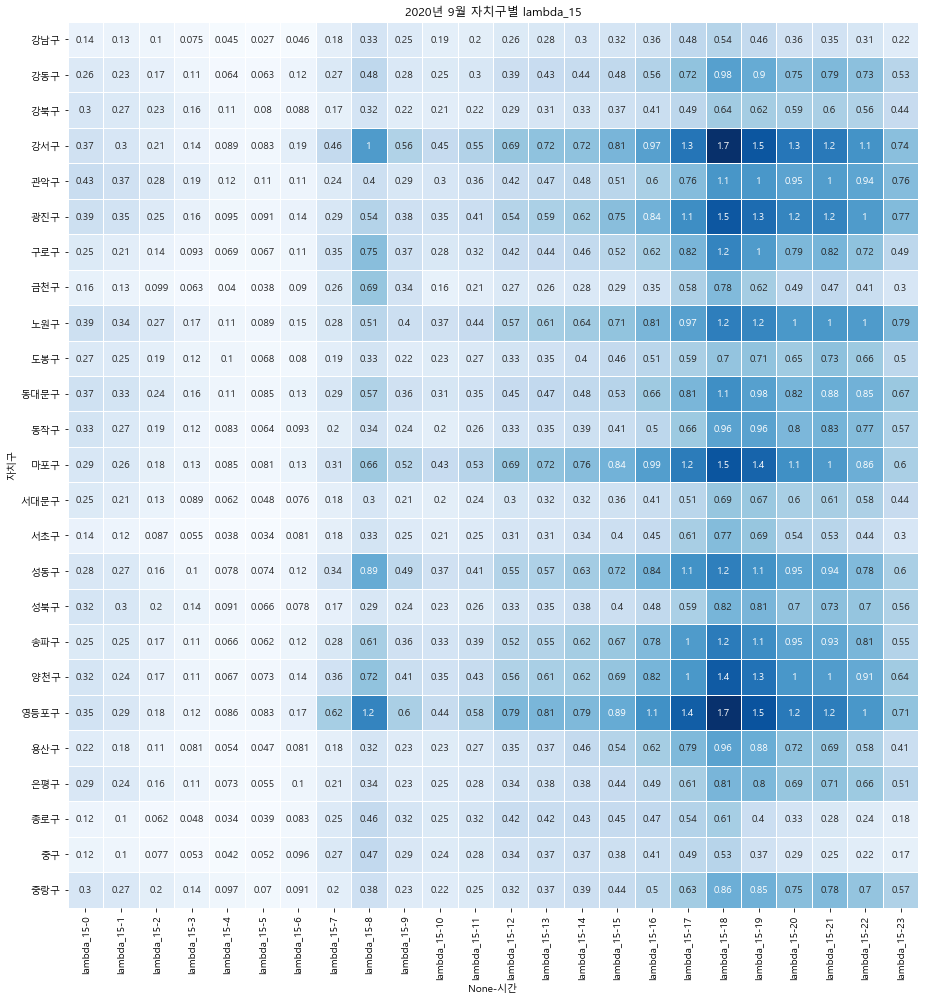

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.163104  0.122304  0.104990  0.082476  0.054586  0.036954  0.064267   
강동구  0.325669  0.254411  0.178083  0.118607  0.073438  0.081499  0.158344   
강북구  0.304554  0.245305  0.190007  0.147621  0.101007  0.085778  0.098129   
강서구  0.392449  0.260120  0.168704  0.123668  0.081965  0.096061  0.239336   
관악구  0.646358  0.449606  0.332989  0.231326  0.159880  0.151919  0.157807   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.251536  0.396686  0.282263  0.162907  0.174706  0.220312  0.253064   
강동구  0.358801  0.641367  0.291529  0.232451  0.272079  0.361453  0.369047   
강북구  0.194827  0.354182  0.212074  0.177544  0.180383  0.226324  0.252621   
강서구  0.572746  1.056696  0.531805  0.393257  0.472309  0.523726  0.563406   
관악구  0.391728  0.537561  0.368638  0.338056  0.408839  0.454757  0.532723   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.263516  0.317085  0.359900  0.466152  0.556060  0.554896  0.404745   
강동구  0.412873  0.453371  0.509593  0.640081  0.906190  0.830813  0.683738   
강북구  0.265822  0.272125  0.340622  0.385141  0.511295  0.504012  0.512850   
강서구  0.553321  0.609552  0.741401  1.025699  1.292047  1.095493  0.995428   
관악구  0.614626  0.677302  0.816339  1.008424  1.421105  1.456304  1.429104   

                                   
시간         21        22        23  
자치구                                
강남구  0.418540  0.332120  0.224544  
강동구  0.738181  0.666060  0.475464  
강북구  0.531741  0.490743  0.362847  
강서구  0.993141  0.806092  0.536809  
관악구  1.469645  1.308196  0.954564

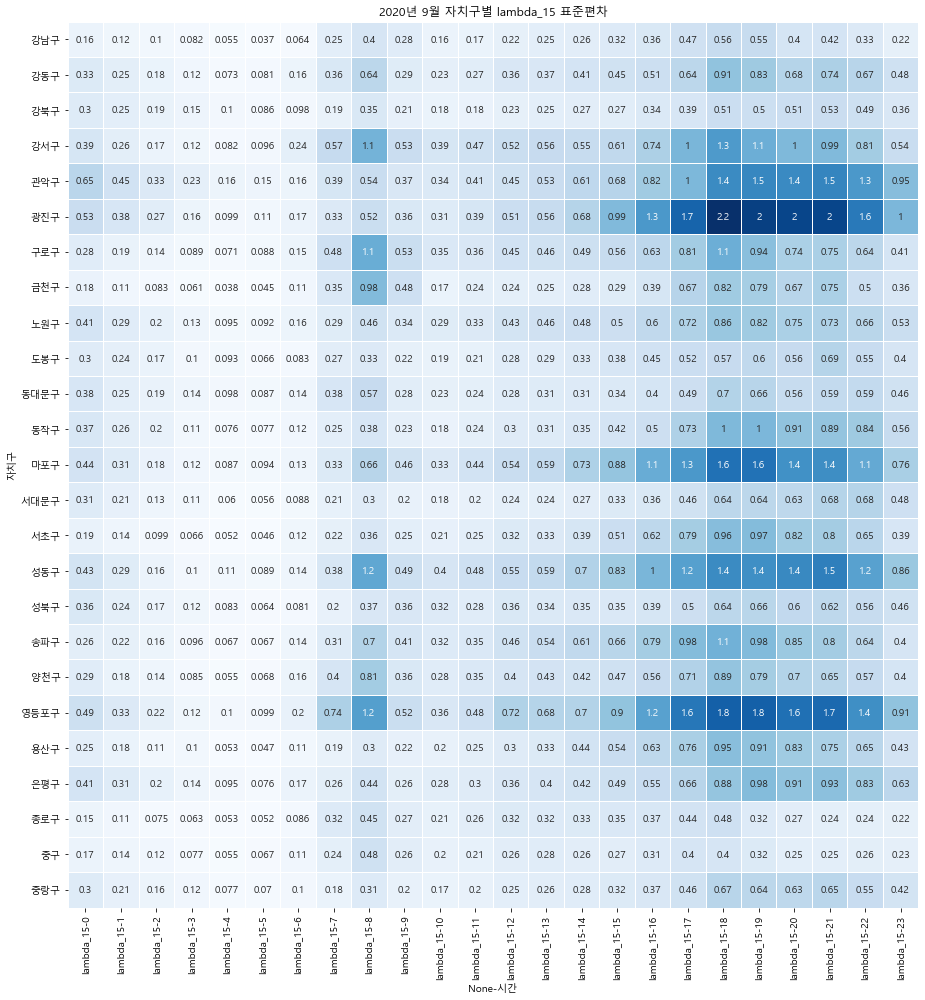

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.119405  0.113183  0.087749  0.068732  0.038604  0.031766  0.071652   
강동구  0.209110  0.179891  0.128876  0.090774  0.050794  0.072421  0.158730   
강북구  0.244749  0.234444  0.192273  0.118333  0.093788  0.065758  0.105606   
강서구  0.281052  0.236768  0.176503  0.112705  0.076230  0.091530  0.226503   
관악구  0.326326  0.275476  0.212564  0.154036  0.106380  0.108203  0.155729   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.171439  0.260114  0.219373  0.208191  0.241524  0.277331  0.302778   
강동구  0.377282  0.505556  0.311706  0.302976  0.353671  0.434921  0.472421   
강북구  0.211667  0.335909  0.242121  0.225455  0.257576  0.319848  0.357424   
강서구  0.551965  0.993511  0.562432  0.497131  0.625820  0.730601  0.738251   
관악구  0.432943  0.527604  0.370964  0.385807  0.420964  0.477865  0.527734   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.345014  0.375570  0.473647  0.634544  0.617949  0.426282  0.374501   
강동구  0.494246  0.530556  0.608234  0.773115  0.890675  0.766468  0.739385   
강북구  0.369545  0.419394  0.464545  0.525758  0.651786  0.587727  0.603788   
강서구  0.780123  0.908948  1.069809  1.391872  1.742418  1.345765  1.228825   
관악구  0.563281  0.577344  0.656120  0.795573  1.010417  1.002865  0.978125   

                                   
시간         21        22        23  
자치구                                
강남구  0.319516  0.255128  0.178490  
강동구  0.693552  0.551687  0.385417  
강북구  0.574697  0.477727  0.374545  
강서구  1.125410  0.855123  0.584836  
관악구  0.920052  0.797135  0.595833

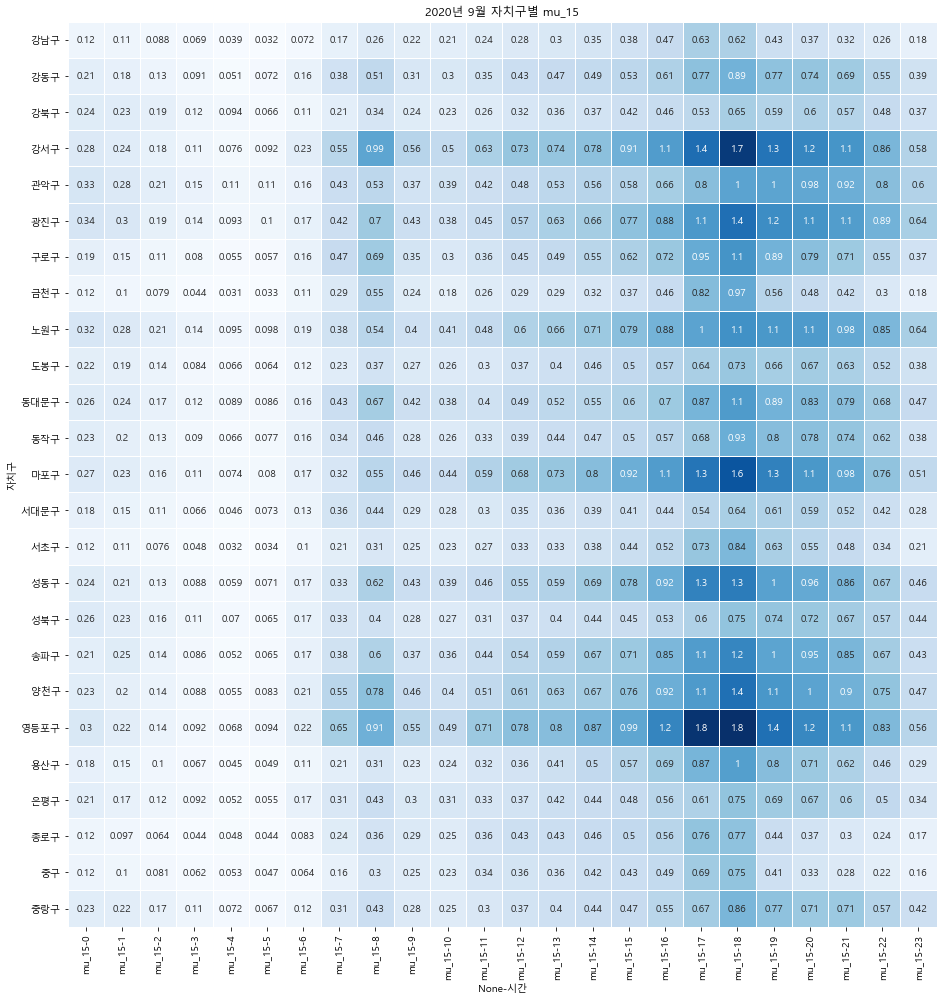

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.129206  0.100560  0.088026  0.062714  0.042697  0.040485  0.082779   
강동구  0.283963  0.201801  0.147472  0.100817  0.060129  0.074502  0.158272   
강북구  0.268833  0.216631  0.192269  0.123587  0.099642  0.073592  0.088817   
강서구  0.320123  0.226073  0.161604  0.107310  0.075108  0.081304  0.192287   
관악구  0.543443  0.367700  0.268629  0.224055  0.143923  0.145694  0.185918   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.188439  0.260215  0.181267  0.160850  0.181957  0.207364  0.251654   
강동구  0.337140  0.485176  0.299864  0.247473  0.286696  0.377568  0.420333   
강북구  0.148670  0.255112  0.166708  0.156720  0.204006  0.250537  0.259097   
강서구  0.433591  0.761389  0.394107  0.344404  0.415713  0.511433  0.526964   
관악구  0.552662  0.647669  0.434829  0.413860  0.442461  0.490962  0.555030   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.277878  0.333507  0.432888  0.578066  0.570717  0.491958  0.407841   
강동구  0.425628  0.456676  0.503840  0.687349  0.820838  0.727966  0.662653   
강북구  0.274027  0.332120  0.376278  0.430500  0.520239  0.501499  0.538373   
강서구  0.550474  0.627580  0.736118  1.060774  1.392577  1.056606  0.992073   
관악구  0.670909  0.700670  0.794903  0.991318  1.285096  1.410158  1.478488   

                                   
시간         21        22        23  
자치구                                
강남구  0.359011  0.296919  0.187786  
강동구  0.652167  0.515335  0.365549  
강북구  0.498080  0.444919  0.310641  
강서구  0.910750  0.692113  0.473465  
관악구  1.314775  1.172278  0.852515

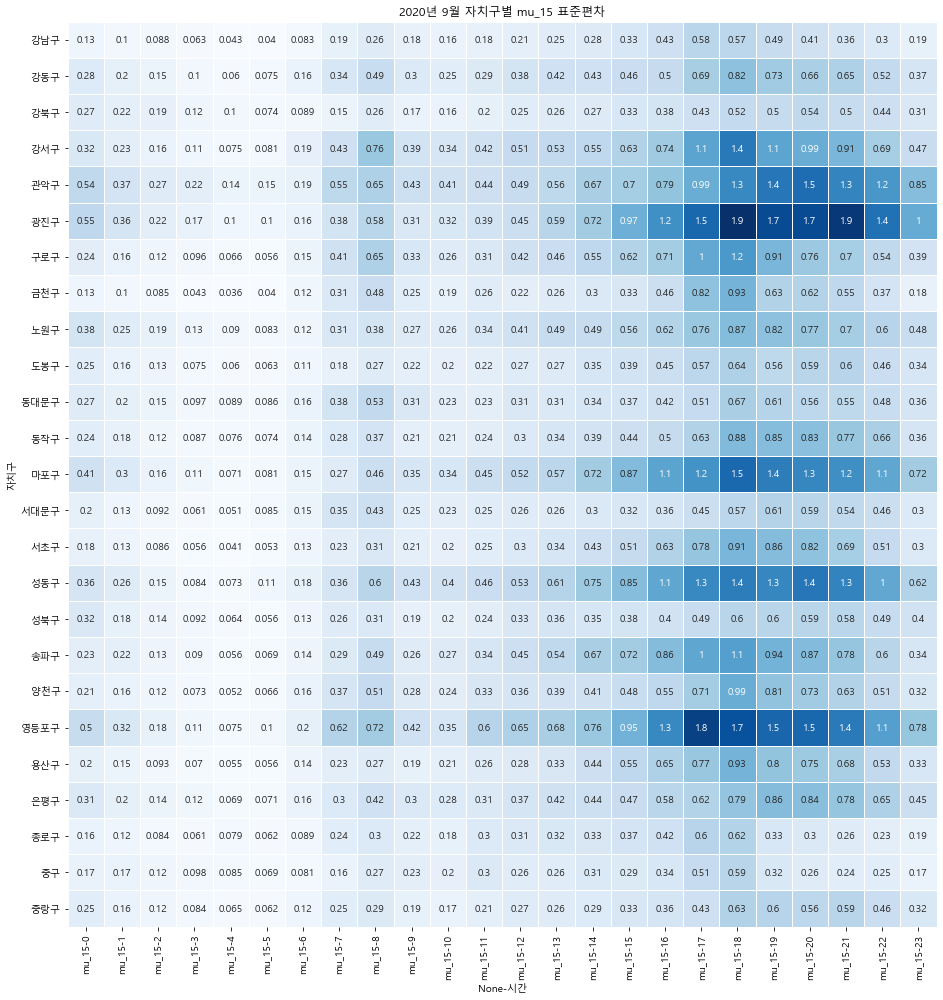

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.025577  1.176220  1.369900  1.055092  1.085635  0.920862  1.073150   
강동구  0.961142  1.221041  1.433017  1.322428  1.161663  1.166748  1.454833   
강북구  0.973009  1.164569  1.298698  1.701826  1.779224  1.246788  0.963424   
강서구  1.148792  1.548967  1.531102  1.784864  1.549335  1.292462  2.150858   
관악구  0.998857  1.304638  1.297346  1.354331  1.293722  1.299387  0.899200   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.575798  1.654878  1.248941  0.972433  0.856861  0.887964  0.945792   
강동구  0.919604  0.963488  1.017091  0.842896  0.829365  0.866117  1.006902   
강북구  0.767639  1.175243  0.987462  0.975992  0.876771  0.964959  0.850848   
강서구  1.436191  1.562200  1.228868  0.932822  0.823267  0.937005  0.965419   
관악구  1.187474  0.943243  0.844569  0.911034  0.846048  0.886322  0.885683   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.881136  0.892020  0.786539  0.821712  0.887792  1.080781  0.971119   
강동구  0.872643  0.869190  0.897003  0.967309  1.097071  1.195676  1.008455   
강북구  0.978878  0.989818  0.900539  1.009774  0.982576  1.116246  1.023504   
강서구  0.905032  0.924728  0.954931  0.938379  1.045781  1.117414  1.075669   
관악구  0.811448  0.879703  0.857632  0.872498  0.973775  0.973709  0.957789   

                                   
시간         21        22        23  
자치구                                
강남구  1.128417  1.316978  1.493667  
강동구  1.168715  1.358099  1.660822  
강북구  1.056342  1.241808  1.175941  
강서구  1.185617  1.375436  1.472212  
관악구  1.080269  1.218956  1.409149

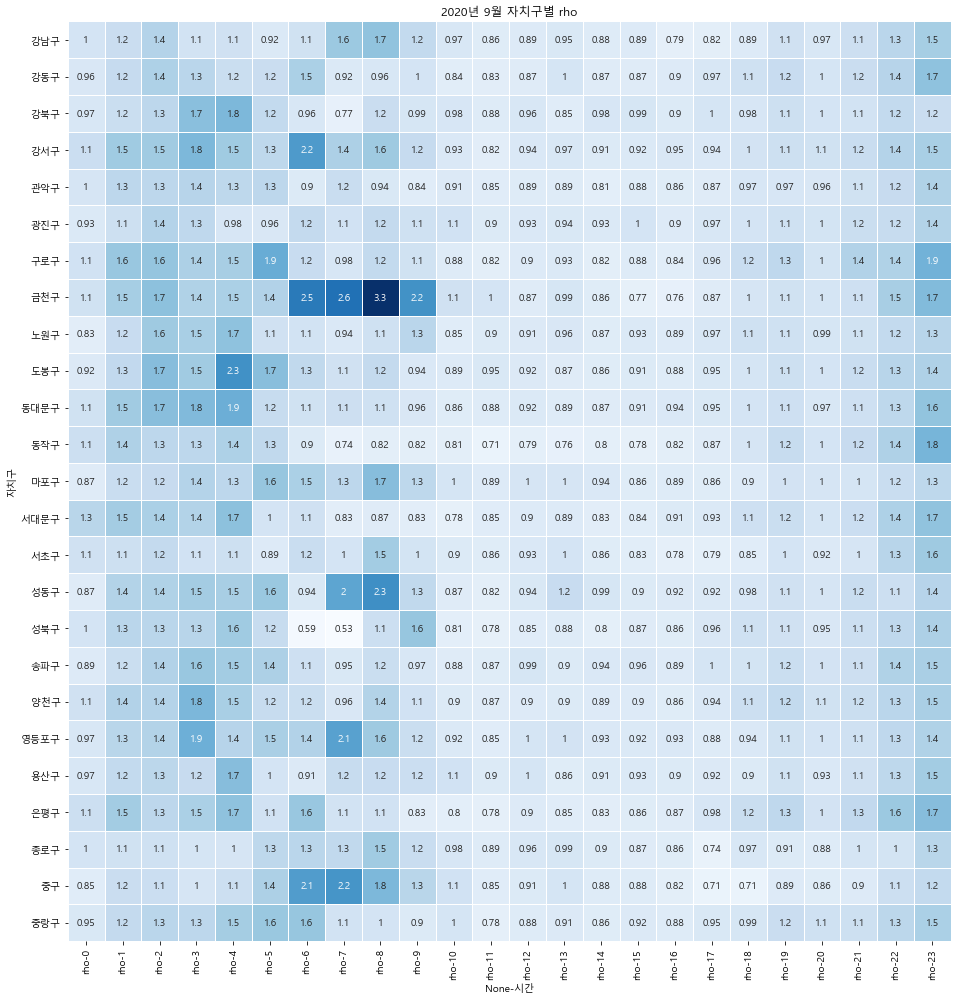

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.132127  1.312639  1.382519  1.264873  1.152932  0.805054  0.794385   
강동구  2.080867  2.711461  2.946674  2.699704  2.364414  1.840166  1.918119   
강북구  1.391317  1.605042  1.837638  1.832382  1.651443  1.690426  1.395418   
강서구  3.679978  4.548540  4.508492  4.457124  3.946843  3.381205  3.306202   
관악구  2.709237  3.303412  3.459831  3.151544  3.409610  2.838327  1.675716   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.263053  1.366723  1.246520  1.060357  1.103419  1.213205  1.133818   
강동구  1.554567  1.880585  1.792742  1.773706  1.856686  1.920085  1.985991   
강북구  1.301639  1.335986  1.420154  1.444656  1.361675  1.348358  1.362042   
강서구  3.146335  3.118769  3.329147  3.209629  3.402860  3.620684  3.976899   
관악구  1.653221  1.752488  1.572913  1.950494  1.981064  2.144316  2.168410   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  1.020523  1.057808  0.907022  0.977189  1.062373  1.275663  1.131352   
강동구  2.017195  2.056517  2.139598  2.147976  2.597931  2.714725  2.348358   
강북구  1.376692  1.369686  1.338552  1.450647  1.509585  1.637805  1.494892   
강서구  3.562778  3.413495  3.771586  4.043620  3.932085  4.504763  4.148493   
관악구  1.873954  2.152839  2.502436  2.655045  3.034393  2.776663  2.482444   

                                   
시간         21        22        23  
자치구                                
강남구  1.289536  1.362324  1.398912  
강동구  2.683308  3.133016  3.047175  
강북구  1.594889  1.781676  1.819399  
강서구  4.545008  4.931245  4.831098  
관악구  3.192797  3.349327  3.562950

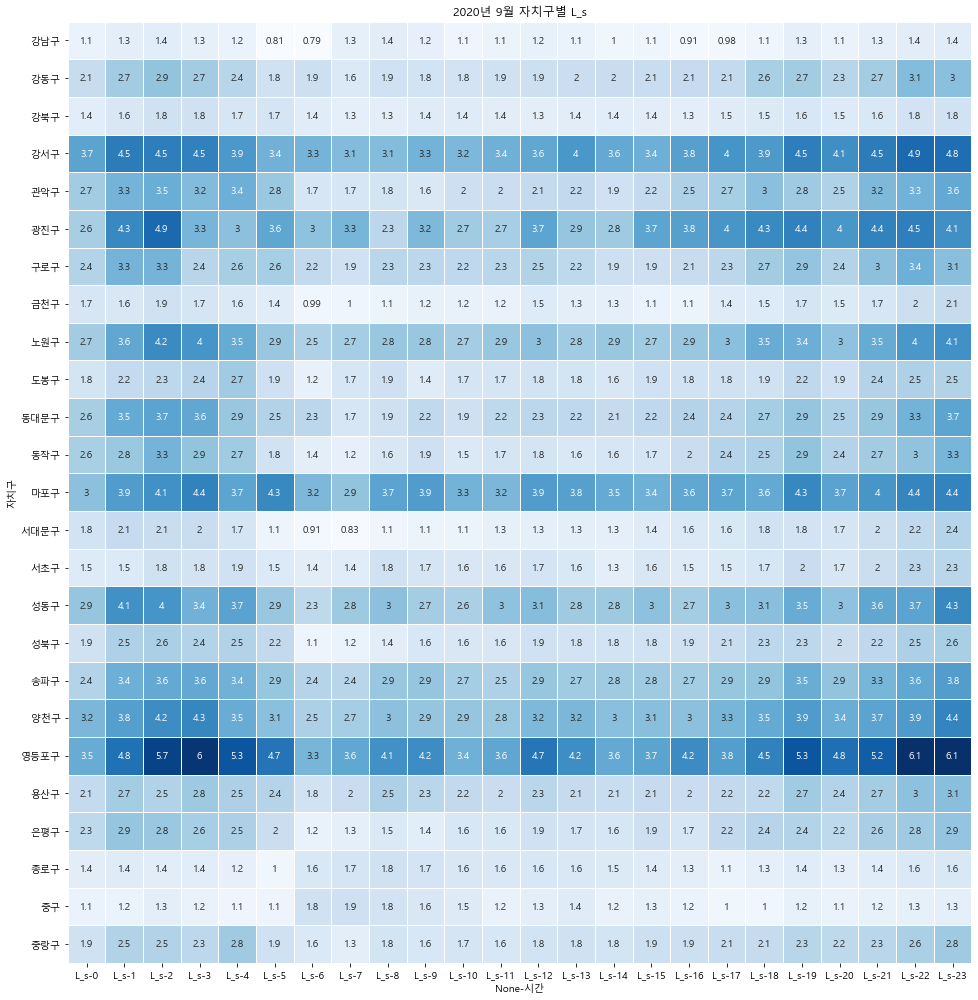

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.917634  2.164506  2.113362  1.884594  1.898443  1.391894  1.360045   
강동구  3.258689  3.580637  3.475863  3.371025  2.985540  3.100445  3.575695   
강북구  1.541210  1.549716  1.566516  1.702348  1.676016  1.917257  1.726793   
강서구  4.416324  4.297445  3.947027  4.314799  5.124833  4.969727  4.865749   
관악구  5.342460  5.302896  5.143380  4.825221  6.245541  6.303590  3.628988   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  2.083479  2.341644  2.275273  1.346257  2.075208  2.123055  1.756317   
강동구  2.490271  2.888407  2.158335  2.080694  2.273123  1.891824  1.908551   
강북구  1.589733  1.550603  1.596391  1.374626  1.224925  1.124476  1.155954   
강서구  4.447463  4.231815  4.117115  3.658225  3.705279  3.350072  3.937051   
관악구  3.847093  2.910777  2.101259  4.938000  4.341900  3.972696  3.589153   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  1.186236  1.401456  0.973155  1.295228  1.358840  1.849430  1.299229   
강동구  2.165129  2.195555  2.498142  2.322116  2.885529  2.929524  2.463130   
강북구  1.193713  1.116340  1.085265  1.178774  1.313585  1.340027  1.200358   
강서구  3.183623  3.078356  3.673249  3.752636  3.161541  3.563641  3.655930   
관악구  2.168570  2.913932  3.760354  4.586211  5.630774  3.773852  3.259227   

                                   
시간         21        22        23  
자치구                                
강남구  1.921633  1.622903  2.055504  
강동구  2.817842  3.432609  3.290795  
강북구  1.312665  1.445842  1.551088  
강서구  4.035588  4.225388  4.051398  
관악구  5.746928  5.313081  5.221228

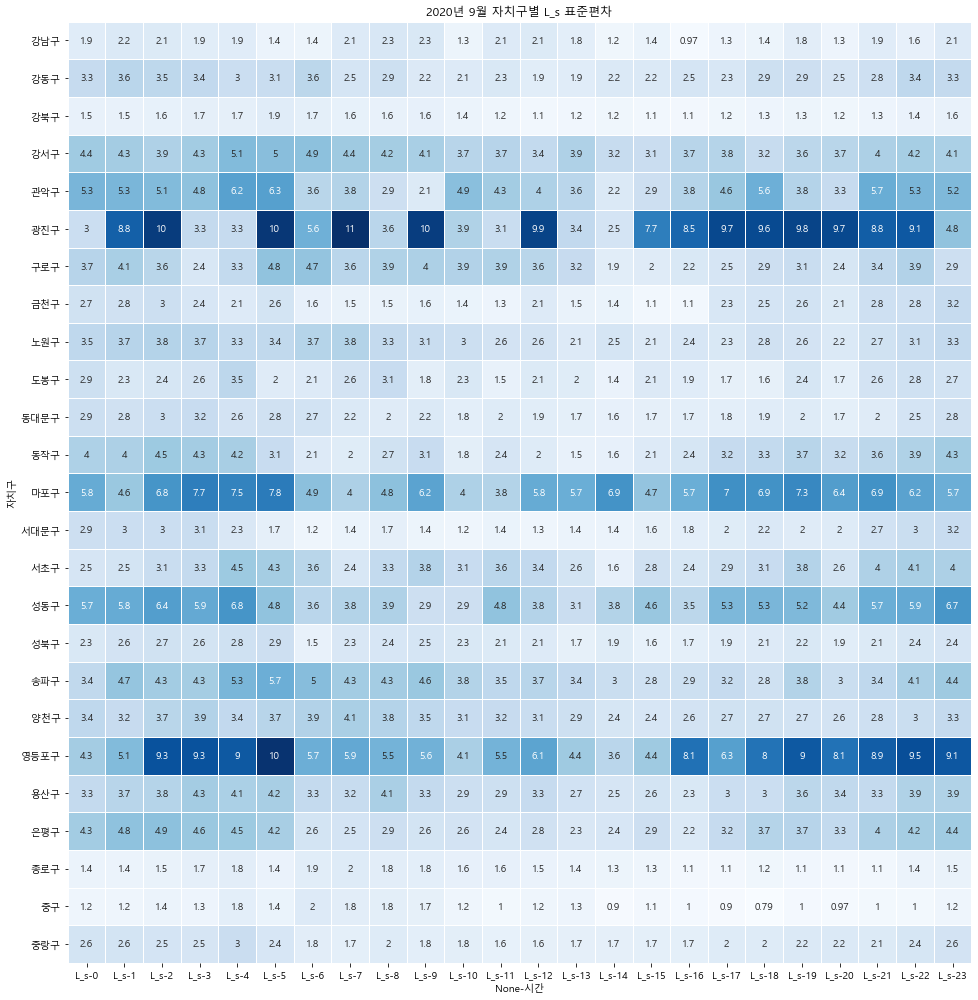

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구  10.758274  16.099305  26.562235  31.701089  46.840177  52.996227   
강동구  10.863105  19.807071  31.544900  45.671466  71.804672  49.882478   
강북구   5.510181   8.957032  14.065419  27.478997  34.230912  40.196625   
강서구  14.617997  32.035457  47.199709  75.175382  87.408614  87.581947   
관악구   5.811550  12.737800  16.934487  27.099856  39.581204  39.093246   

                                                                              \
시간          6          7         8          9         10        11        12   
자치구                                                                            
강남구  30.297879  14.114799  8.491946   8.354422  7.706910  6.550783  5.504991   
강동구  32.073196   8.669163  6.873623  13.023392  8.428923  7.419462  6.469658   
강북구  26.128196   9.559376  6.073620   8.038426  8.329463  7.707795  6.084646   
강서구  55.028454  10.970563  5.572231   8.601339  9.299566  6.813600  6.259496   
관악구  20.536729  14.376058  5.999936   7.210568  6.612221  5.825885  5.485136   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  4.835795  4.306978  3.891142  3.144140  2.352876  2.392266  3.774319   
강동구  6.519287  5.292120  5.148913  4.408427  3.726777  3.580713  4.248435   
강북구  5.405322  5.136274  5.057245  4.078302  3.695144  2.983191  3.647482   
강서구  6.477476  5.863211  4.855532  4.479683  3.692968  3.142833  4.218086   
관악구  4.907952  4.547482  4.668680  4.157328  3.579003  2.963755  3.098060   

                                              
시간         20        21        22         23  
자치구                                           
강남구  4.295325  5.405075  6.968929  10.857149  
강동구  3.962451  4.568711  6.309344  11.180941  
강북구  3.402897  3.409686  4.547919   5.663166  
강서구  4.561851  5.447831  7.753759  11.988620  
관악구  3.280696  3.621134  4.275737   6.136138

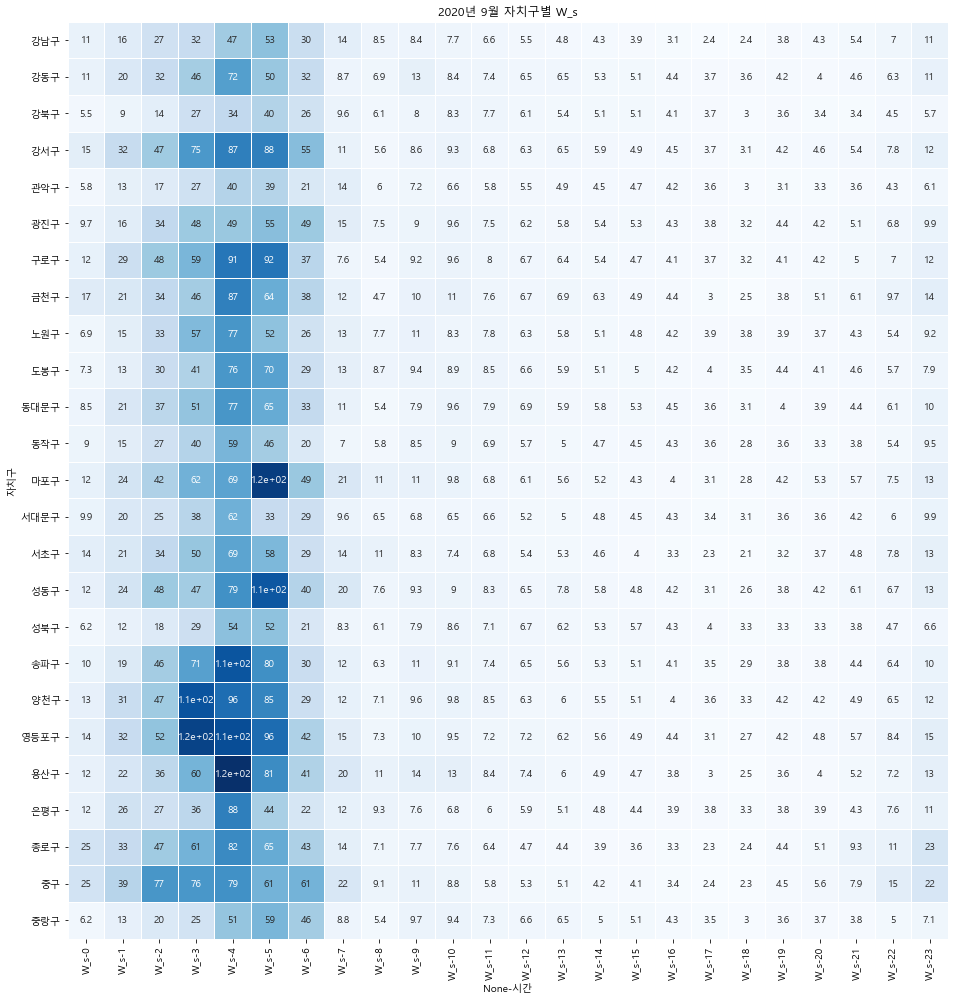

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                           \
시간          0          1          2          3           4           5    
자치구                                                                       
강남구  13.233508  19.377796  35.531422  42.359659   67.512876  110.836168   
강동구  18.587846  28.176610  30.291387  51.225593   93.384343   94.524094   
강북구   5.597136   8.155909  11.736505  36.766364   46.499657   37.035366   
강서구  18.794225  36.874666  43.738289  94.557131  122.797284  145.145211   
관악구   5.949961  16.534178  15.674730  26.157021   37.091340   60.771248   

                                                                      \
시간           6          7          8          9         10        11   
자치구                                                                    
강남구   55.711576  18.272000   9.317066  10.285622  6.888745  5.882936   
강동구   51.607583  14.106057  13.073526  27.336645  5.671612  5.140517   
강북구   37.366940   9.037324   5.773845   7.292498  5.706854  5.508470   
강서구  123.961382  13.123067   7.818828   9.394597  7.010891  3.809893   
관악구   23.354083  33.980648   4.642690   5.831305  5.051733  3.747697   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  4.990767  3.327634  4.206426  2.776570  2.396920  1.901609  1.679680   
강동구  4.500749  6.932142  2.753287  3.002582  2.410612  2.090662  2.121679   
강북구  3.752835  3.583339  3.137512  4.098640  2.440518  2.065796  1.932896   
강서구  3.168169  3.032874  2.836214  2.384677  2.496786  1.763631  1.688262   
관악구  4.130901  3.176332  2.683885  2.750887  2.374620  2.001379  1.562966   

                                                        
시간         19        20        21        22         23  
자치구                                                     
강남구  2.568231  3.337630  5.004528  6.213786  13.491617  
강동구  2.531533  2.193737  2.721546  3.906756  14.577219  
강북구  2.177744  1.874962  1.649257  2.492304   2.977078  
강서구  2.097891  2.372430  3.193230  5.862474   9.669152  
관악구  1.573538  1.839340  1.839315  2.364808   3.693152

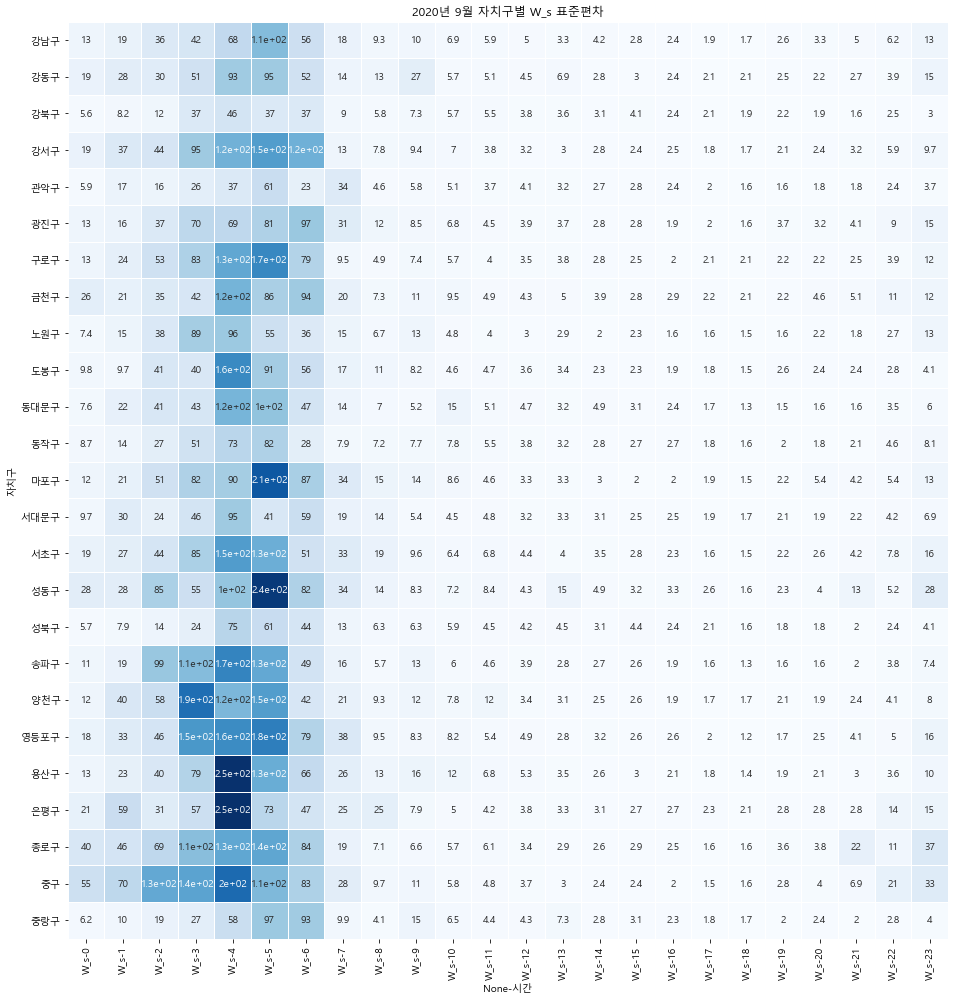

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2045,흑석한강푸르지오 106동앞
2046,흑석한강푸르지오(110동)
2047,흥국사 정류장
2048,희성오피앙


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['KC 대학교',
 '가락고등학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '묘곡초등학교',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학교 앞',
 '서울과학기술대학교(어학교육원)',
 '서울대학교 정문',
 '서울도봉초등학교인근',
 '서울디자인직업전문학교 앞',
 '서울미래초등학교 

In [43]:
len(school)

131

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
972,강서구,KC 대학교,0,0.091667,0.008333,11.000000,0.916667,120.000000,학교
973,강서구,KC 대학교,1,0.141667,0.033333,4.250000,0.809524,30.000000,학교
974,강서구,KC 대학교,2,0.033333,0.025000,1.333333,0.571429,40.000000,학교
975,강서구,KC 대학교,3,0.041667,0.000000,0.000000,0.000000,0.000000,학교
976,강서구,KC 대학교,4,0.033333,0.008333,4.000000,0.800000,120.000000,학교
...,...,...,...,...,...,...,...,...,...
49760,동대문구,휘봉고등학교 앞,20,0.541667,0.383333,1.413043,1.918183,5.807011,학교
49761,동대문구,휘봉고등학교 앞,21,0.525000,0.466667,1.125000,1.646653,4.453588,학교
49762,동대문구,휘봉고등학교 앞,22,0.533333,0.308333,1.729730,2.132657,7.615597,학교
49763,동대문구,휘봉고등학교 앞,23,0.366667,0.241667,1.517241,1.997050,9.393808,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고려대학교 2번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 2번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '교대역 5번출구뒤',
 '교대역 6번출구',
 '교보타워 버스정류장(신논현역 3번출구 후면)',
 '구산역 2번 출구',
 '구산역 4번출구',
 '구파발역 2번출구',
 '국회의사당역 3번출구 옆',
 '국회의사당역 5번출구 옆',
 '군자역 7번출구 베스트샵 앞',
 '군자역 7번출구뒤',
 '군자역2번출구',
 '금호역 1번출구 앞',
 '금호역 3번출구',
 '길음역 3번출구 뒤',
 '까치산역 3번 출구',
 '낙성대역 1번출구',
 '낙성대역 3번출구 뒤',
 '낙성대역 8번 출구',
 '남부터미널역 1번출구'

In [46]:
len(subway)

410

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
74,강남구,3호선 매봉역 3번출구앞,0,0.200000,0.133333,1.500000,2.758294,22.384615,지하철
75,강남구,3호선 매봉역 3번출구앞,1,0.116667,0.125000,0.933333,1.862298,19.311000,지하철
76,강남구,3호선 매봉역 3번출구앞,2,0.133333,0.066667,2.000000,3.161290,49.000000,지하철
77,강남구,3호선 매봉역 3번출구앞,3,0.108333,0.083333,1.300000,2.509692,33.860676,지하철
78,강남구,3호선 매봉역 3번출구앞,4,0.025000,0.033333,0.750000,1.444302,64.457143,지하철
...,...,...,...,...,...,...,...,...,...
49858,동작구,흑석역 4번출구,19,0.550000,0.525000,1.047619,1.558114,3.868576,지하철
49859,동작구,흑석역 4번출구,20,0.408333,0.441667,0.924528,1.402081,4.409976,지하철
49860,동작구,흑석역 4번출구,21,0.450000,0.600000,0.750000,1.148571,3.018018,지하철
49861,동작구,흑석역 4번출구,22,0.591667,0.475000,1.245614,1.770852,4.516324,지하철


In [48]:
apart

['DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '건영아파트 앞',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞',
 '래미안금호하이리버 아파트 102동 옆',
 '래미안라센트아파트 103동 앞',
 '래미안신공덕3차아파트',
 '래미안월곡아파트 입구',
 '리센츠아파트',
 '마천금호어울림 1차아파트 건너편',
 '멤피스아파트 앞',
 '면목 대원칸타빌아파트',
 '면목도시개발아파트 1동 앞',
 '면목삼익아파트 앞',
 '목동11단지 아파트',
 '목동1단지아파트 118동 앞',
 '목동1단지아파트 상가

In [49]:
len(apart)

180

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
461,서대문구,DMC센트럴아이파크아파트,0,0.425000,0.166667,2.550000,3.401646,20.710392,아파트
462,서대문구,DMC센트럴아이파크아파트,1,0.300000,0.291667,1.028571,2.056322,8.692134,아파트
463,서대문구,DMC센트럴아이파크아파트,2,0.208333,0.183333,1.136364,2.253874,14.503944,아파트
464,서대문구,DMC센트럴아이파크아파트,3,0.150000,0.083333,1.800000,3.029397,38.053908,아파트
465,서대문구,DMC센트럴아이파크아파트,4,0.141667,0.033333,4.250000,3.695916,111.138173,아파트
...,...,...,...,...,...,...,...,...,...
49030,서대문구,홍은센트레빌 아파트 앞,19,0.283333,0.250000,1.133333,0.000000,0.000000,아파트
49031,서대문구,홍은센트레빌 아파트 앞,20,0.083333,0.116667,0.714286,0.000000,0.000000,아파트
49032,서대문구,홍은센트레빌 아파트 앞,21,0.083333,0.150000,0.555556,0.000000,0.000000,아파트
49033,서대문구,홍은센트레빌 아파트 앞,22,0.183333,0.108333,1.692308,0.000000,0.000000,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공원',
 '솔밭공원역',
 '송이공원',
 '신내능말공원',
 '신내어울공원 앞',
 '신도림테크노근린공원',
 '신트리공원 입구',
 '앙카라공원 앞',
 '양지근린공원앞',
 '어린이대공원정문',
 '연

In [52]:
len(park)

104

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2549,마포구,가온문화공원,0,0.116667,0.133333,0.875000,1.333923,14.334320,공원
2550,마포구,가온문화공원,1,0.100000,0.091667,1.090909,1.608532,22.450195,공원
2551,마포구,가온문화공원,2,0.000000,0.033333,0.000000,0.000000,0.000000,공원
2552,마포구,가온문화공원,3,0.041667,0.041667,1.000000,1.500000,48.000000,공원
2553,마포구,가온문화공원,4,0.000000,0.041667,0.000000,0.000000,0.000000,공원
...,...,...,...,...,...,...,...,...,...
49685,중구,훈련원공원주차장 앞,19,0.375000,0.516667,0.725806,1.110627,3.464380,공원
49686,중구,훈련원공원주차장 앞,20,0.308333,0.450000,0.685185,1.045567,3.897289,공원
49687,중구,훈련원공원주차장 앞,21,0.266667,0.441667,0.603774,0.910778,3.797336,공원
49688,중구,훈련원공원주차장 앞,22,0.175000,0.308333,0.567568,0.849362,5.323081,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.091667,0.008333,11.000000,0.916667,120.000000,학교
1,강서구,KC 대학교,1,0.141667,0.033333,4.250000,0.809524,30.000000,학교
2,강서구,KC 대학교,2,0.033333,0.025000,1.333333,0.571429,40.000000,학교
3,강서구,KC 대학교,3,0.041667,0.000000,0.000000,0.000000,0.000000,학교
4,강서구,KC 대학교,4,0.033333,0.008333,4.000000,0.800000,120.000000,학교
...,...,...,...,...,...,...,...,...,...
20132,중구,훈련원공원주차장 앞,19,0.375000,0.516667,0.725806,1.110627,3.464380,공원
20133,중구,훈련원공원주차장 앞,20,0.308333,0.450000,0.685185,1.045567,3.897289,공원
20134,중구,훈련원공원주차장 앞,21,0.266667,0.441667,0.603774,0.910778,3.797336,공원
20135,중구,훈련원공원주차장 앞,22,0.175000,0.308333,0.567568,0.849362,5.323081,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.274506  0.198864  0.145032  0.089663  0.062580  0.053526  0.101683   
아파트  0.249567  0.216938  0.140463  0.086667  0.058935  0.048519  0.059907   
지하철  0.325883  0.309962  0.224818  0.142886  0.096463  0.104593  0.191301   
학교   0.233484  0.195025  0.131552  0.085115  0.054517  0.037595  0.051654   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.201442  0.409295  0.276122  0.258894  0.314423  0.413381  0.427143   
아파트  0.168287  0.324398  0.202037  0.187778  0.238056  0.321157  0.343831   
지하철  0.432195  0.698333  0.479248  0.405915  0.499167  0.627459  0.670366   
학교   0.154453  0.310496  0.209224  0.194784  0.221692  0.287087  0.319847   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.474599  0.557612  0.668189  0.842468  1.058810  0.997196  0.851282   
아파트  0.365231  0.414120  0.482824  0.651343  0.903009  0.816528  0.690556   
지하철  0.716057  0.800163  0.936179  1.220479  1.507378  1.322805  1.094736   
학교   0.330280  0.367048  0.429644  0.535878  0.719338  0.654898  0.567875   

                                   
시간         21        22        23  
특성                                 
공원   0.885657  0.763462  0.544311  
아파트  0.701944  0.680509  0.496713  
지하철  1.080346  0.928577  0.655285  
학교   0.599109  0.550000  0.416539

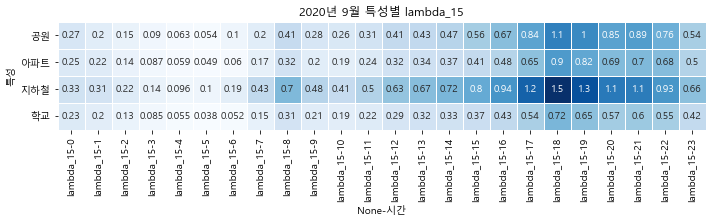

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.332219  0.206863  0.147171  0.095231  0.063284  0.070220  0.116310   
아파트  0.263796  0.177317  0.115729  0.079207  0.066305  0.053371  0.069537   
지하철  0.436446  0.322204  0.230934  0.135835  0.093200  0.114366  0.212267   
학교   0.274430  0.195434  0.142002  0.095709  0.057049  0.046929  0.061380   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.276533  0.475577  0.301540  0.257559  0.323725  0.383904  0.401832   
아파트  0.302952  0.538277  0.212130  0.159823  0.196108  0.282349  0.287861   
지하철  0.466639  0.727966  0.446890  0.359980  0.451087  0.555340  0.606898   
학교   0.160596  0.349154  0.223934  0.189946  0.205136  0.274027  0.299810   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.477078  0.582517  0.739408  0.838743  0.972432  0.932483  0.834953   
아파트  0.305790  0.343321  0.419410  0.549934  0.709047  0.664727  0.592051   
지하철  0.670333  0.825204  1.045968  1.363712  1.626666  1.564947  1.449153   
학교   0.316627  0.387010  0.465950  0.586684  0.748183  0.738036  0.608696   

                                   
시간         21        22        23  
특성                                 
공원   0.923402  0.759433  0.536198  
아파트  0.583295  0.542926  0.378696  
지하철  1.472726  1.192580  0.791075  
학교   0.635038  0.560609  0.398654

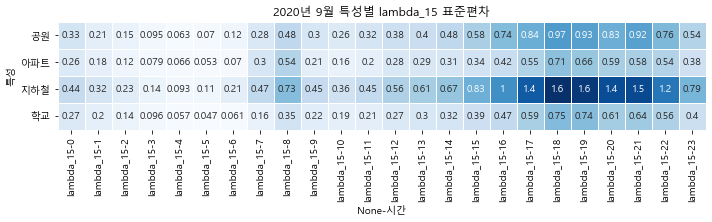

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.203580  0.170076  0.107051  0.068750  0.046955  0.071234  0.164022   
아파트  0.177033  0.165308  0.104491  0.073565  0.052917  0.075000  0.194861   
지하철  0.285027  0.258084  0.190254  0.132093  0.083963  0.078862  0.161707   
학교   0.159488  0.130721  0.086387  0.056298  0.043893  0.059160  0.142875   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.418349  0.512099  0.333734  0.325721  0.386058  0.461779  0.456667   
아파트  0.410556  0.476435  0.293380  0.272037  0.314120  0.355463  0.374908   
지하철  0.416098  0.727134  0.475589  0.425610  0.522663  0.641138  0.711850   
학교   0.323473  0.405916  0.248410  0.244211  0.284606  0.333015  0.353626   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.523638  0.603205  0.718510  0.876362  1.016746  0.851042  0.813862   
아파트  0.415093  0.452963  0.536111  0.666019  0.823148  0.694769  0.658472   
지하철  0.780833  0.866768  0.997480  1.294931  1.576362  1.280976  1.129695   
학교   0.389122  0.430725  0.502863  0.591285  0.644338  0.559478  0.537277   

                                   
시간         21        22        23  
특성                                 
공원   0.757692  0.594151  0.384215  
아파트  0.610972  0.481806  0.319769  
지하철  1.017297  0.812663  0.567907  
학교   0.496120  0.417875  0.274809

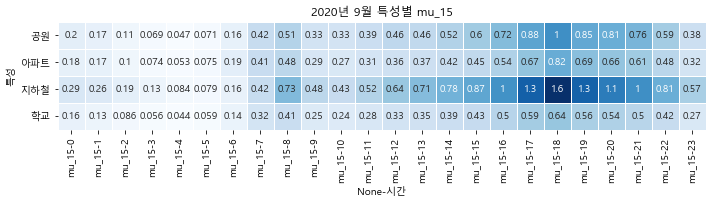

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.245516  0.168670  0.106919  0.067966  0.057771  0.077532  0.164379   
아파트  0.199551  0.141162  0.085004  0.070523  0.055393  0.073202  0.164146   
지하철  0.419039  0.288219  0.197565  0.133319  0.089488  0.085428  0.158085   
학교   0.209738  0.129843  0.092289  0.062601  0.054497  0.077424  0.149172   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.399684  0.440746  0.277863  0.279770  0.341777  0.395881  0.407974   
아파트  0.338733  0.412586  0.228917  0.198869  0.280369  0.278461  0.269460   
지하철  0.431329  0.698518  0.393973  0.342980  0.431556  0.528011  0.610477   
학교   0.332894  0.347739  0.193953  0.191817  0.205224  0.262779  0.294399   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.516605  0.584401  0.689400  0.820054  0.920367  0.809110  0.816596   
아파트  0.301631  0.341594  0.436468  0.589332  0.669678  0.564146  0.549590   
지하철  0.719620  0.853572  1.032797  1.317542  1.587188  1.407846  1.351821   
학교   0.327781  0.402464  0.484538  0.588385  0.661148  0.628454  0.571498   

                                   
시간         21        22        23  
특성                                 
공원   0.773820  0.582876  0.387937  
아파트  0.511788  0.407286  0.269388  
지하철  1.305285  1.032234  0.707572  
학교   0.543529  0.486531  0.306347

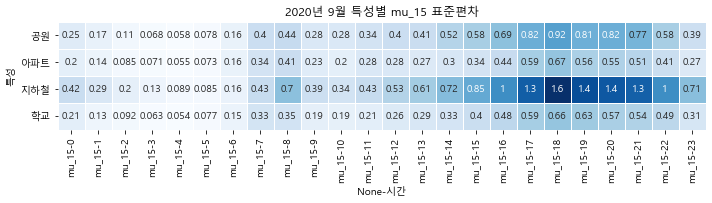

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.080894  1.265988  1.554342  1.402311  1.656574  1.270922  1.399557   
아파트  1.146002  1.496231  1.546073  1.658459  1.338557  0.788652  0.491451   
지하철  0.840861  1.195876  1.262564  1.223786  1.453214  1.819717  1.656800   
학교   1.260417  1.605217  1.609208  1.687517  1.554403  0.944250  0.717562   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.756651  1.150794  0.962064  0.828332  0.820080  0.869259  0.905256   
아파트  0.446172  0.663472  0.641552  0.754012  0.741620  0.881388  0.876121   
지하철  1.369192  1.134984  1.035177  0.992613  0.956271  0.963531  0.936983   
학교   1.060561  1.207710  0.952404  0.887799  0.763286  0.843796  0.944647   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.911287  0.910267  0.886497  0.969557  1.081447  1.197619  1.072550   
아파트  0.845188  0.901220  0.862761  1.016427  1.138845  1.184567  1.035477   
지하철  0.925595  0.930723  0.938756  0.928216  0.977207  1.010866  0.951069   
학교   0.815939  0.851483  0.832238  0.903863  1.128468  1.179566  1.061754   

                                   
시간         21        22        23  
특성                                 
공원   1.230103  1.319812  1.689510  
아파트  1.198701  1.478171  1.782707  
지하철  1.047809  1.184335  1.211160  
학교   1.322824  1.563505  1.888484

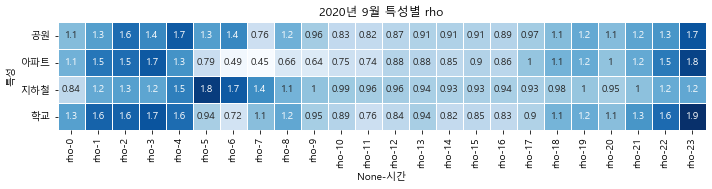

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.670059  3.003576  3.554747  3.188018  2.896536  2.149684  1.656565   
아파트  2.008490  2.638709  2.698050  2.335922  2.178389  1.353510  0.711653   
지하철  2.862879  4.015178  4.353901  3.896123  3.986400  4.385175  3.905221   
학교   1.849545  2.274541  2.355226  2.110226  1.812212  1.172152  0.701967   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.392025  2.124466  1.922567  1.780353  1.948787  2.216456  2.405868   
아파트  0.800662  1.303966  1.277942  1.289449  1.456659  1.872612  1.892470   
지하철  3.500546  3.336139  3.531207  3.268730  3.430228  3.552370  3.151141   
학교   0.935365  1.344436  1.413354  1.189846  1.426503  1.561050  1.578576   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   2.265629  2.438436  2.562948  2.676630  2.921191  3.271865  2.783188   
아파트  1.813472  1.925565  1.870562  2.106352  2.244115  2.465637  2.201225   
지하철  2.956248  3.165325  3.442543  3.503003  3.538426  3.944201  3.491420   
학교   1.442667  1.522805  1.506509  1.627044  1.967898  2.073855  1.858530   

                                   
시간         21        22        23  
특성                                 
공원   3.284055  3.501351  3.582935  
아파트  2.378188  2.825376  2.968744  
지하철  4.043779  4.354947  4.169817  
학교   2.144943  2.194208  2.401771

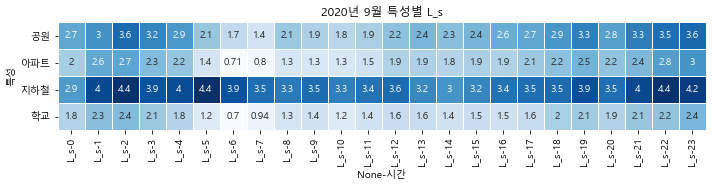

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   3.638518  3.823631  4.350178  3.897724  3.989148  4.207572  3.296778   
아파트  2.778340  2.871336  2.861598  2.500131  2.656532  1.831424  1.524484   
지하철  4.300130  5.722155  7.134674  5.733755  6.518269  7.994508  5.669992   
학교   2.706165  3.073699  3.024216  2.800943  2.659194  2.153413  1.104977   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   2.797103  4.058526  2.820691  2.145187  2.245575  2.354650  2.793080   
아파트  1.707248  2.082920  1.675253  1.650819  1.469331  2.204216  2.071968   
지하철  6.015428  4.553369  6.132349  4.276959  4.617792  5.621109  3.691862   
학교   1.982534  2.389353  2.453407  1.413154  2.468704  2.505241  2.251844   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   2.285892  2.633410  3.016007  2.988900  3.332763  3.531050  2.835998   
아파트  1.963138  2.191714  1.972023  2.284122  2.189439  2.548294  2.263569   
지하철  3.152120  4.503154  5.906492  5.799403  6.129902  6.745963  6.323395   
학교   1.715477  1.980648  1.860831  2.105725  2.508262  2.774989  2.340317   

                                   
시간         21        22        23  
특성                                 
공원   3.641098  3.834336  4.006359  
아파트  2.427105  2.959774  2.982221  
지하철  6.704360  6.937479  5.981813  
학교   2.804916  2.547335  2.898442

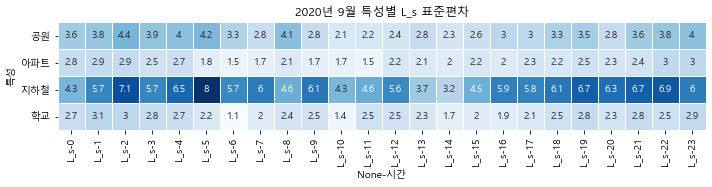

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원   13.136917  25.066603  49.096784  63.401796  97.696096  85.480660   
아파트   9.128851  19.285056  33.679621  59.526116  73.397609  40.823738   
지하철  10.910330  20.693812  37.477276  50.085279  83.233976  95.901007   
학교   13.276415  21.886461  39.849025  56.367890  65.556557  49.294453   

                                                                              \
시간          6          7         8          9         10        11        12   
특성                                                                             
공원   30.670955   9.081011  7.489957  10.311483  8.491194  7.832251  6.250757   
아파트  11.699606   5.685393  4.746675   6.850704  7.867109  6.785123  6.557466   
지하철  44.134101  14.774102  7.183231   9.010071  9.150627  7.826104  6.274523   
학교   26.861403  13.097797  8.153885   8.447689  8.020628  6.848552  6.190419   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   6.298734  5.666135  4.976695  4.201281  3.643652  3.242585  4.189379   
아파트  5.993900  5.447516  4.984727  4.247637  3.721494  2.981026  3.583557   
지하철  5.324083  4.885744  4.501094  4.000938  3.113066  2.565354  3.427107   
학교   5.922766  5.146970  4.961166  4.208749  3.625684  3.568800  4.538289   

                                              
시간         20        21        22         23  
특성                                            
공원   4.313109  5.224100  6.974464  12.205499  
아파트  3.524553  3.930553  5.658663   9.895282  
지하철  3.819791  4.840428  6.707554   9.722165  
학교   4.470948  5.315020  7.747704  12.859010

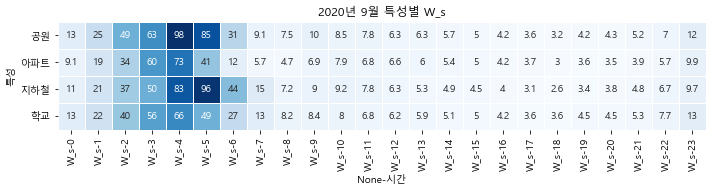

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                            \
시간          0          1          2           3           4           5    
특성                                                                         
공원   18.114507  33.173218  69.844269   89.631024  147.622884  191.905994   
아파트  11.463836  20.460696  38.648344  102.442139  113.093979   72.928003   
지하철  21.586097  28.534443  70.038376   73.916866  134.576760  155.851684   
학교   18.162111  23.038677  51.130591   76.698751   79.569282   73.570067   

                                                                      \
시간          6          7          8          9          10        11   
특성                                                                     
공원   55.006614  11.512043   9.623659  13.515622   6.469923  7.212138   
아파트  19.777726   8.917494   5.830979   6.569006  10.942869  5.021373   
지하철  62.992592  19.719161   8.638304   7.700163   6.113440  5.294283   
학교   73.460089  39.129878  12.690527   7.802778   5.738659  5.068662   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   3.835409  3.888926  3.325309  2.977369  2.467745  2.086318  1.935850   
아파트  5.094992  5.432286  4.813104  3.346423  2.984035  2.523864  1.853930   
지하철  3.744778  3.025508  2.713275  2.308249  2.031428  1.627922  1.259594   
학교   4.485293  3.713924  3.114775  3.174640  2.524471  2.111421  2.125993   

                                                        
시간         19        20        21        22         23  
특성                                                      
공원   2.218643  2.379969  3.824070  5.823585  13.297045  
아파트  2.124316  2.076557  2.307624  3.686836  10.783402  
지하철  1.539604  2.004848  3.049577  6.697032   8.629148  
학교   3.457062  3.082511  4.026927  8.598385  16.815265

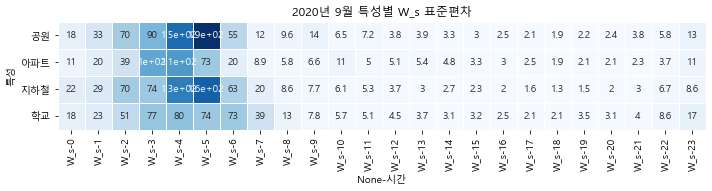

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()